<a href="https://colab.research.google.com/github/drsimonturega/student_simple_ml/blob/main/MKR_KNN_ML_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student_simple_ML
### Simple KNN classification model
### You need to be logged into your google acount to use this code
### There are three sections of code that need to be run in sequence;
- ### Lab book code for this experiemnt
- ### Upload inmput file
- ### Simple KNN with confussion matrix

In [27]:
# @title ## Lab book code for this experiemnt
# @markdown ### Enter the lab book code for this experiemnt
lab_book_code = 'test_5' # @param {type:"string"}
import os
import shutil

os.chdir("/content")
try:
    os.mkdir(lab_book_code)
except FileExistsError:
    print(f'A folder for {lab_book_code} already exists you may over write your\
        data if you continue')
    #the lines below remove the folder! not currently implimented
    #os.chdir("..")
    #shutil.rmtree("lab_book_code")
!pwd
os.chdir(lab_book_code)
!pwd


/content
/content/test_5


## Upload input file single file (*.csv lab data and classifier)

In [28]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
print(type(uploaded.keys()))
spec_input = list(uploaded.keys())
spec_input = str(spec_input[0])

#spec_input = spec_input[:-4]
print(f'{spec_input}')
spec_inp= pd.DataFrame()
try:
    spec_inp = pd.read_csv(f'{spec_input}', encoding='unicode_escape')
except PermissionError:
    print('The file we are trying to open may be open in another \
                program, please close and try again!')

spec_inp.head()

Saving FTIR_input_16072024.csv to FTIR_input_16072024.csv
User uploaded file "FTIR_input_16072024.csv" with length 1852508 bytes
<class 'dict_keys'>
FTIR_input_16072024.csv


,Chem_ID,3995.710303,3991.987107,3988.26391,3984.540714,3980.817518,3977.094321,3973.371125,3969.647929,3965.924732,...,682.0655508,678.3423545,674.6191581,670.8959618,667.1727654,663.4495691,659.7263727,656.0031764,652.27998,648.5567837
0,blank,99.836405,99.707823,99.814021,99.753386,99.755629,99.816564,99.862513,99.773564,99.744903,...,43.142473,42.615299,42.113705,41.661705,41.315195,40.822636,40.323437,39.886447,39.492411,39.084044
1,blank,99.846280,99.830344,99.850958,99.674413,99.556362,99.666006,99.911221,99.919609,99.904548,...,43.192696,42.703079,42.221448,41.727621,41.325861,40.883445,40.371252,39.925182,39.563759,39.142629
2,blank,99.790825,99.816148,100.022573,99.963399,99.934663,99.923438,99.827897,99.833748,99.929850,...,43.054345,42.552403,42.102230,41.609311,41.108211,40.720044,40.308468,39.816243,39.325717,38.912276
3,blank,100.136668,100.083155,100.010848,100.026697,99.912364,99.818939,100.078088,100.181994,99.907660,...,43.187000,42.694023,42.221516,41.744834,41.327377,40.899801,40.433973,39.942327,39.504350,39.070185
4,blank,100.080463,100.140436,99.971428,99.749227,99.755784,99.747263,99.919134,100.034840,99.962043,...,43.143208,42.668545,42.219274,41.787396,41.349523,40.879930,40.447350,39.965914,39.485640,39.126371


### Building KNN clasifcation model with scikitlearn

Accuracy train: 0.8467153284671532
Accuracy test: 0.6857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

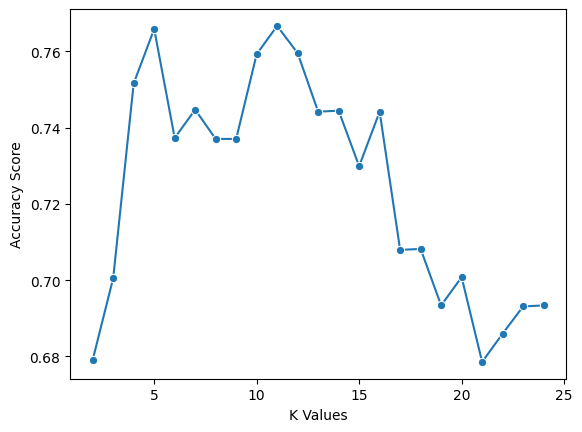

[0.6791005291005291, 0.7005291005291006, 0.7515873015873016, 0.7658730158730159, 0.7373015873015873, 0.7447089947089948, 0.737037037037037, 0.737037037037037, 0.7592592592592592, 0.7666666666666666, 0.7595238095238095, 0.7441798941798942, 0.7444444444444442, 0.7298941798941799, 0.7441798941798942, 0.7079365079365079, 0.7082010582010582, 0.6933862433862433, 0.7007936507936507, 0.6785714285714286, 0.685978835978836, 0.6931216931216931, 0.6933862433862433]
9
11
Accuracy: 0.7142857142857143
Precision: 0.7142857142857143
Recall: 0.5


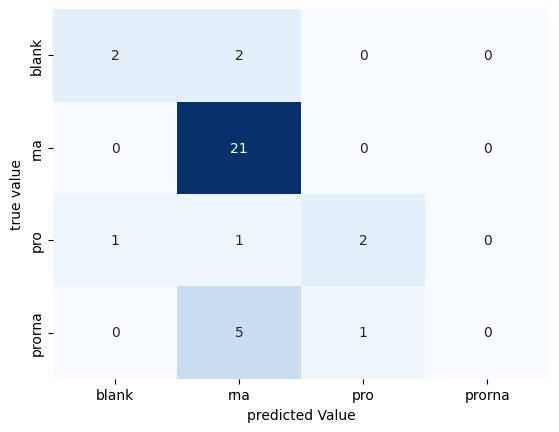

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

# Splitting into scores(y) and disciptors (x)
spec_dat = spec_inp
# uses sklearn to normalise the spectral part of the df then do ML prep
#pandas DataFrame into a NumPy array
X = spec_dat.drop("Chem_ID", axis=1)
X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X = X.values
y = spec_dat["Chem_ID"]
y = y.values

# Splitting data into test and training setting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15354)
# Building KNN classification model with scikitlearn
# Fitting a kNN classification
# Fitting a kNN classification

# setting up model!
knn_c_model = KNeighborsClassifier(n_neighbors=3)

#running model
knn_c_model.fit(X_train, y_train)

# calculating rmse on training set
from sklearn.metrics import accuracy_score
from math import sqrt
train_c_preds = knn_c_model.predict(X_train)
test_c_preds = knn_c_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_c_preds)
test_accuracy = accuracy_score(y_test, test_c_preds)
print("Accuracy train:", train_accuracy)
print("Accuracy test:", test_accuracy)

# Using Cross Validation to Get the Best Value of k
k_values = [i for i in range (2,25)]
scores = []

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
opt_plo = sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show(opt_plo, True)

# train our model using the best k value
#best_index = [x for x in best_index if str(x) != 'nan']
best_index = np.argmax(scores)
print(scores)
print(best_index)
best_k = k_values[best_index]
print(best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# need to think about precision and acuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')#needs some thought
recall = recall_score(y_test, y_pred, average='macro')#needs some thought

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
#print(f'y_test {y_test}')
#print(f'y_pred {y_pred}')
#print(f'{confusion_matrix}')
con_mat = sns.heatmap(confusion_matrix,cmap='Blues',cbar=False, annot=True)
plt.xticks(np.arange(4)+0.5,["blank","rna","pro","prorna"])
plt.yticks(np.arange(4)+0.5,["blank","rna","pro","prorna"])
plt.xlabel("predicted Value")
plt.ylabel("true value")
plt.show(con_mat, True)